# **Support Vector Regressor**

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#let's create the data points
from sklearn.datasets import make_regression

#create the dependent and independent data
X, y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [5]:
X

array([[-2.35518632,  0.92501922],
       [-0.72782582,  1.02526817],
       [-0.91589724, -0.71273144],
       ...,
       [ 0.05478614, -0.09013722],
       [ 0.07390849, -1.37252119],
       [-3.77932808, -0.7589041 ]])

In [6]:
y

array([-4.21013849e+01,  5.76693236e+01, -1.18727480e+02, -1.57097033e+02,
        4.74098912e-02,  6.08131767e+01, -1.46867426e+02,  1.17432343e+02,
        3.77902313e+01,  1.78158945e+02, -1.18722219e+02, -3.48122880e+01,
        4.85569771e+01, -2.55563464e+01,  1.36418109e+02, -1.04796595e+02,
       -7.67511189e+01,  6.00943779e+01, -1.24669948e+01,  1.43812755e+02,
       -1.42370858e+02,  2.47108367e+02,  5.90815922e+01,  2.48593769e+01,
       -1.13422851e+01,  3.61485377e+01, -3.54366022e+01, -1.41369210e+02,
        1.39750382e+01, -1.33541351e+02, -1.33358524e+02, -4.68738328e+01,
        9.96992850e+01,  9.50474319e+01, -1.38482082e+02,  3.42456908e+01,
       -1.83323013e+02, -4.05692693e+01,  9.27775063e+01, -1.28420611e+02,
       -1.73383621e+01,  4.39504609e+01, -6.84625239e+01, -7.95588715e+01,
        1.24618727e+02, -6.31663294e+01,  1.79178288e+01, -1.05004908e+02,
       -8.66271804e+01,  2.33764412e+02, -1.40160146e+01,  1.63231392e+02,
       -4.99047192e+01, -

<AxesSubplot:xlabel='0', ylabel='1'>

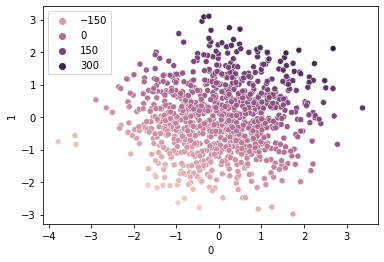

In [7]:
#visualize the data
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [8]:
#split the data into train and test data
from sklearn.model_selection import train_test_split

#make train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

In [9]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [10]:
#import the support vector regression
from sklearn.svm import SVR

#define the model
svr = SVR(kernel = "linear")

In [11]:
#fit the model
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[53.9351413 , 92.11435409]])

In [15]:
#predict the model
y_pred = svr.predict(X_test)
y_pred

array([-9.72244211e+01,  1.51988047e+01,  1.05573403e+02,  3.91163483e+01,
        2.29227558e+01,  1.23593130e+02, -9.18109054e+01, -9.30694025e+01,
        7.76935705e+01,  1.63620451e+02, -1.26211009e+02,  3.83164443e+01,
       -3.52310894e+01,  4.50039359e+01, -1.17126200e+02, -1.05254997e+02,
       -3.91224348e+01, -5.10249831e+01,  2.23009044e+01, -3.82527958e+01,
        7.51329621e+01,  7.25009043e+01,  4.82565983e+01, -4.90302733e+01,
       -1.39232648e+02, -1.41241019e+02,  6.58344723e+00, -8.53025283e+01,
        1.13477650e+02,  2.56705428e+01,  4.35543476e+01,  1.19511261e+02,
       -4.98556996e+01, -1.62031915e+02, -6.87490627e+01, -1.58571257e+02,
       -2.16905865e+02, -1.09793368e+02,  1.21135404e+02, -1.04278899e+02,
       -1.21862670e+02,  1.98756861e+01,  4.85013641e+00, -5.92232948e+01,
       -9.61835186e+01,  5.25398005e+01,  1.36514162e+02, -9.09665051e+01,
        9.33151064e+01, -1.12897062e+02, -5.97570613e+00,  3.83099962e+01,
        4.13628507e+01,  

In [17]:
#printing and finding the r2_score
from sklearn.metrics import r2_score

#define the r2_score
score = r2_score(y_pred, y_test)
print(score)

0.9992761682604338


### Hyper Parameter Tuning with SVR

In [19]:
#import the grid search cv
from sklearn.model_selection import GridSearchCV

#define the parameters
parameters = {
    "C" : [0.1, 1, 10, 100, 1000],
    "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel" : ["linear"],
    "epsilon" : [0.1, 0.2, 0.3]
}

In [21]:
#define the grid search cv
grid = GridSearchCV(svr, param_grid = parameters, cv = 5, refit = True, verbose = 3)

#fit the model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.703 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.703 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C

[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=

[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5]

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.5s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=li

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [23]:
#predict the model
y_pred = grid.predict(X_test)

#print the accuracy
print(r2_score(y_pred, y_test))

0.9993062064990029
